<a href="https://colab.research.google.com/github/khongpan/DurianIrritation/blob/main/WaterStress00001_01_ETo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
notebook_path='/content/gdrive/MyDrive/Colab Notebooks'
if (notebook_path not in sys.path) :
  sys.path.append(notebook_path)
#print(sys.path)

import requests
import xml.etree.ElementTree as etree
import pandas as pd
from datetime import datetime
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from agritronics import *

Mounted at /content/gdrive/


In [ ]:
def CalcSatVapourPressureSlope(t) :
  k=t+237.3
  delta= 4096*(0.61078*np.exp(17.27*t/k))/k**2
  return delta

def CalcSatVapourPressure(t) :
  svp=0.61078*np.exp(t/(t+238.3)*17.2694)
  return svp

def CalcActualVapourPressure(svp,h) :
  avp= svp*h/100
  return avp

def CalcVPD(t,rh):
  svp=0.61078*np.exp(t/(t+238.3)*17.2694)
  vpd = svp * (1-rh/100)
  return vpd
 
def CalcWind2m(w) :
  w2m = w*1000./3600.
  #print(w2m)
  return w2m

def CalcNetRadiation(i) :
  return i*5.*60./1000000.

def CalcPsychrometricConstant(p) :
  gamma=p*0.665*10**-3
  #print(gamma)
  return gamma

def CalcETo(t,rh,p,i,w) :
  svp_slope= CalcSatVapourPressureSlope(t)
  net_rad = CalcNetRadiation(i)
  wind_speed = CalcWind2m(w)
  psy_const = CalcPsychrometricConstant(p)
  vpd = CalcVPD(t,rh)
  eto=(0.408*svp_slope*net_rad+psy_const*(900.0/(288)/(t+273))*wind_speed*vpd)/(svp_slope+psy_const*(1+0.34*wind_speed))
  return eto

In [ ]:
def m_avg(a,n) :
  pad_size = n//2
  a_len = len(a)
  a = np.pad(a,pad_size,mode='linear_ramp',end_values=(a[0],a[-1]))
  a = np.insert(a,0,0)
  cumsum = np.cumsum(a)
  m_a = (cumsum[n:n+a_len]-cumsum[0:a_len])/float(n)
  return m_a

def Time2Sampling(time_str) :
    s_time_dt = dt.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
    sampling_number = s_time_dt.hour*12+int(s_time_dt.minute/5)
    return sampling_number

def TimeStrToSecOfDay(time_str, mode='') :
  time_dt = dt.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
  s_of_day = time_dt.hour*60*60+time_dt.minute*60
  return s_of_day

def ReSamplingDailyData(time_str_s, value_s, period_in_sec) :
  if len(value_s)==24*60*60 :
    return value_s
  
  x_s = [TimeStrToSecOfDay(time_str) for time_str in time_str_s]
  y_s = value_s
  f = interpolate.interp1d(x_s, y_s,fill_value= 'extrapolate')
  xnew_s = np.arange(0,24*60*60, period_in_sec)
  ynew_np = f(xnew_s)

  return ynew_np.tolist()

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-01
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-01
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-01
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-01
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-01
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-01
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-01
2021-01-01 00:00:00 ETo 5.4


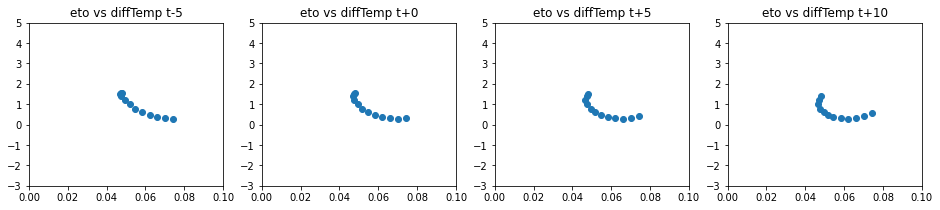

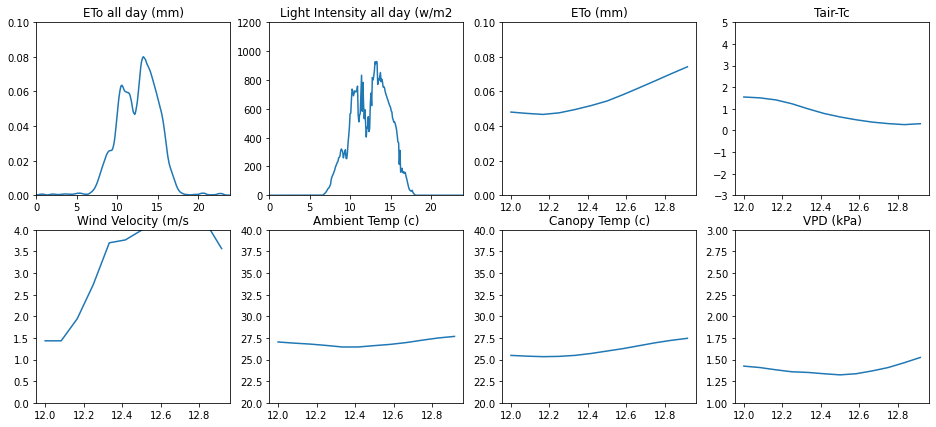

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-02
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-02
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-02
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-02
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-02
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-02
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-02
2021-01-02 00:00:00 ETo 5.7


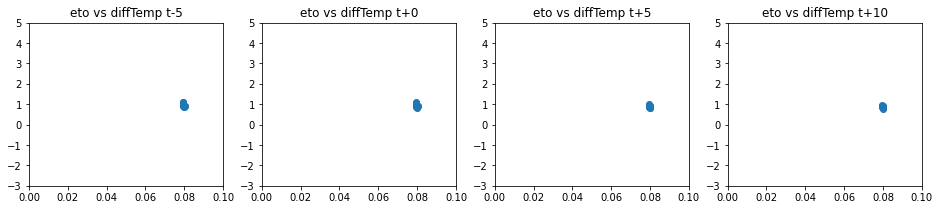

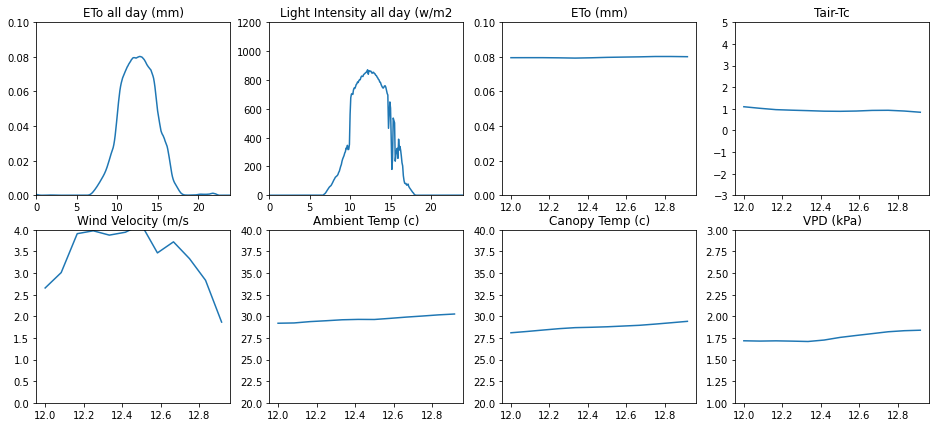

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-03
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-03
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-03
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-03
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-03
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-03
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-03
2021-01-03 00:00:00 ETo 6.1


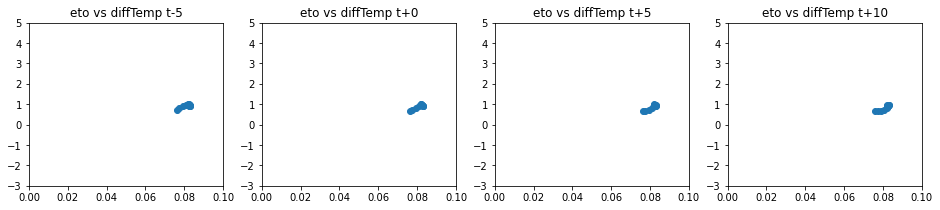

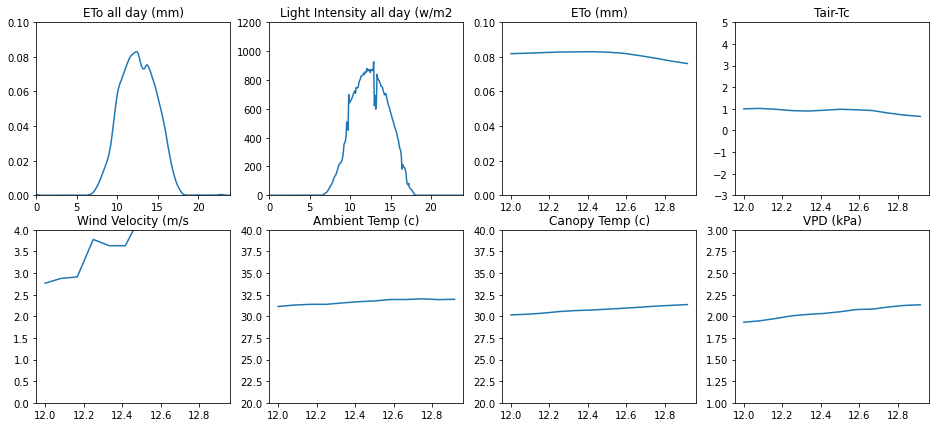

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-04
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-04
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-04
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-04
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-04
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-04
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-04
2021-01-04 00:00:00 ETo 6.5


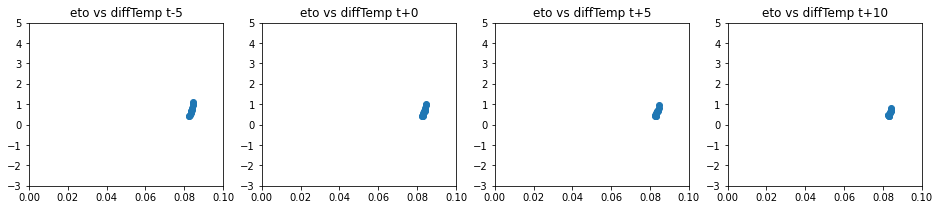

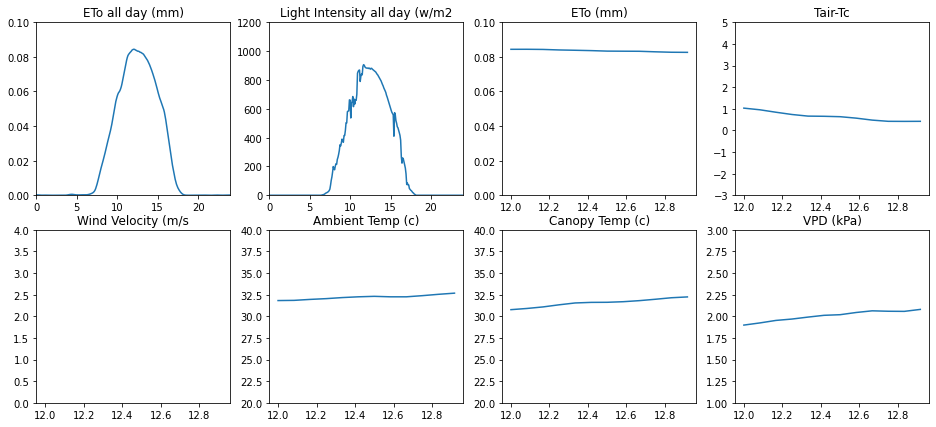

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-05
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-05
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-05
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-05
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-05
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-05
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-05
2021-01-05 00:00:00 ETo 3.2


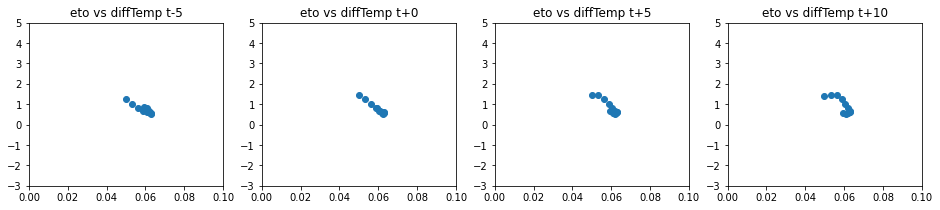

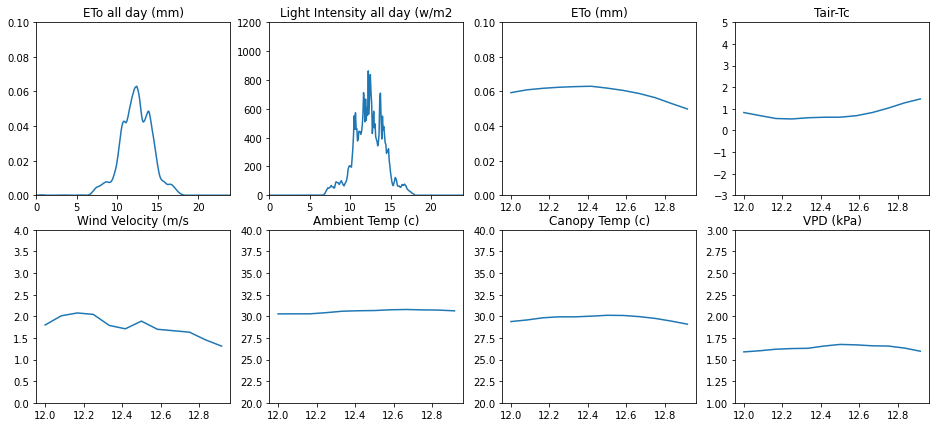

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-06
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-06
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-06
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-06
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-06
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-06
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-06
2021-01-06 00:00:00 ETo 5.6


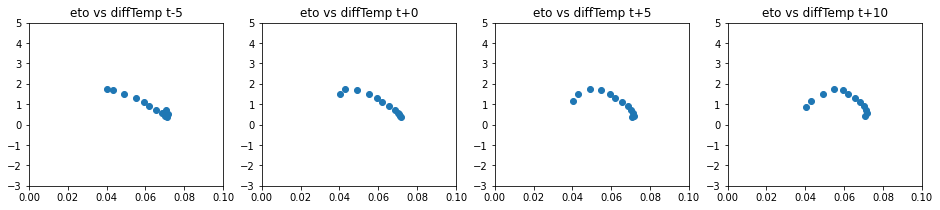

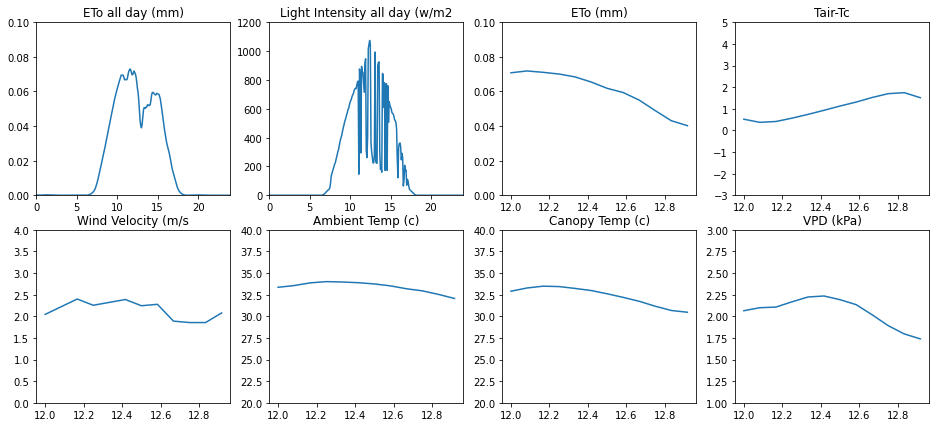

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-07
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-07
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-07
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-07
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-07
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-07
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-07
2021-01-07 00:00:00 ETo 5.3


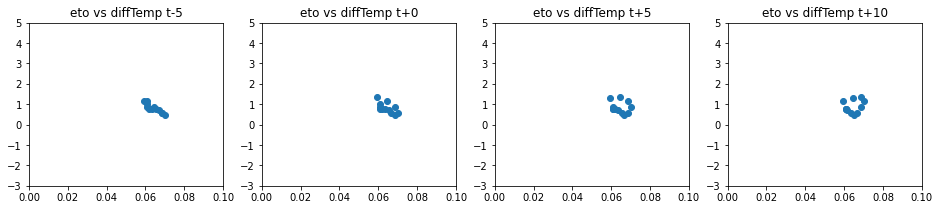

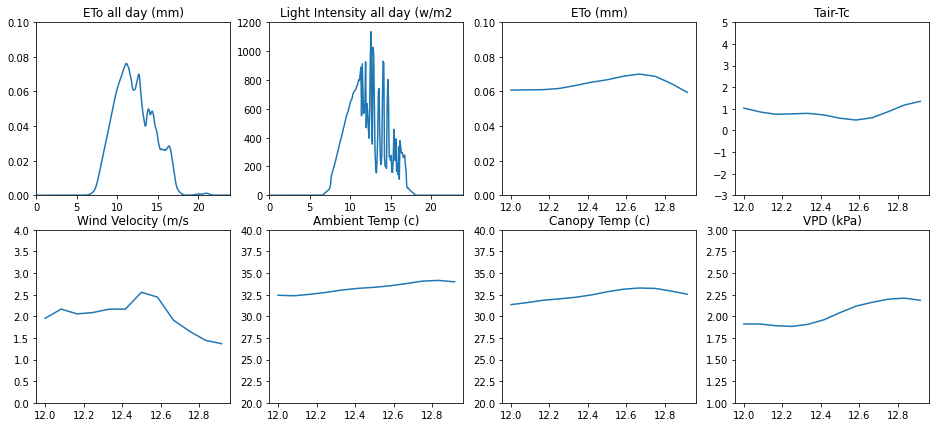

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-08
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-08
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-08
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-08
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-08
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-08
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-08
2021-01-08 00:00:00 ETo 6.7


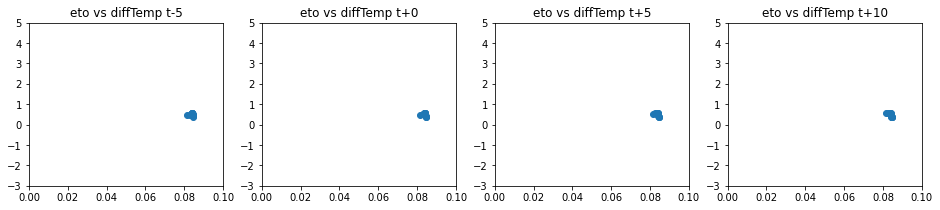

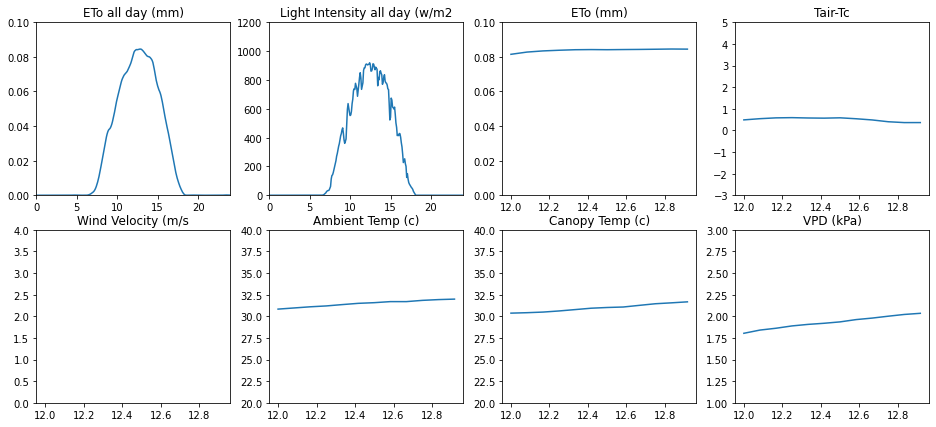

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-09
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-09
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-09
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-09
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-09
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-09
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-09
2021-01-09 00:00:00 ETo 6.6


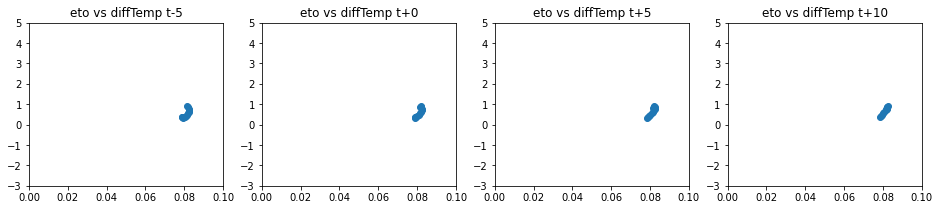

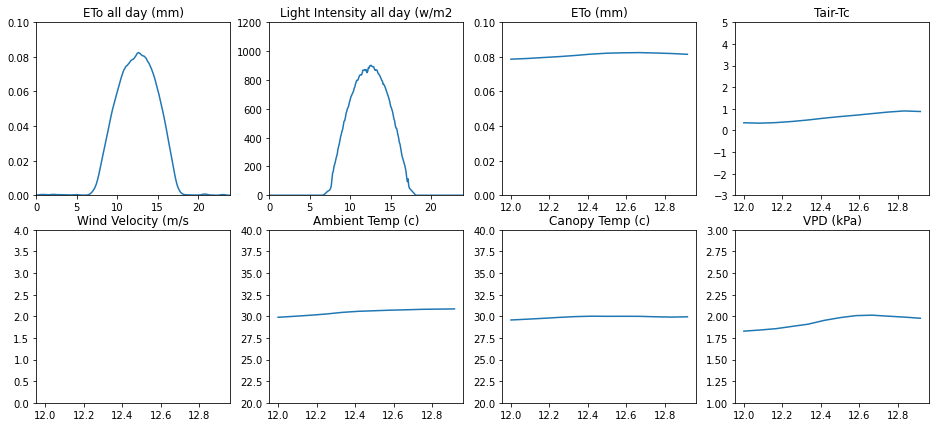

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-10
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-10
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-10
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-10
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-10
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-10
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-10
2021-01-10 00:00:00 ETo 6.7


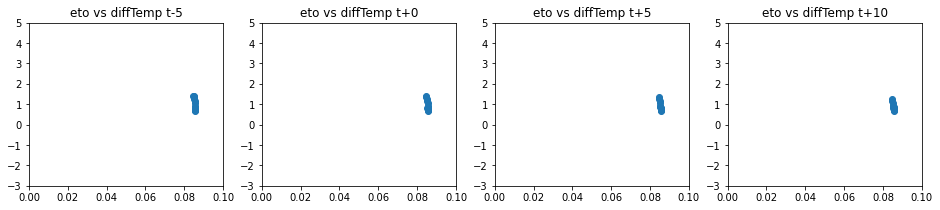

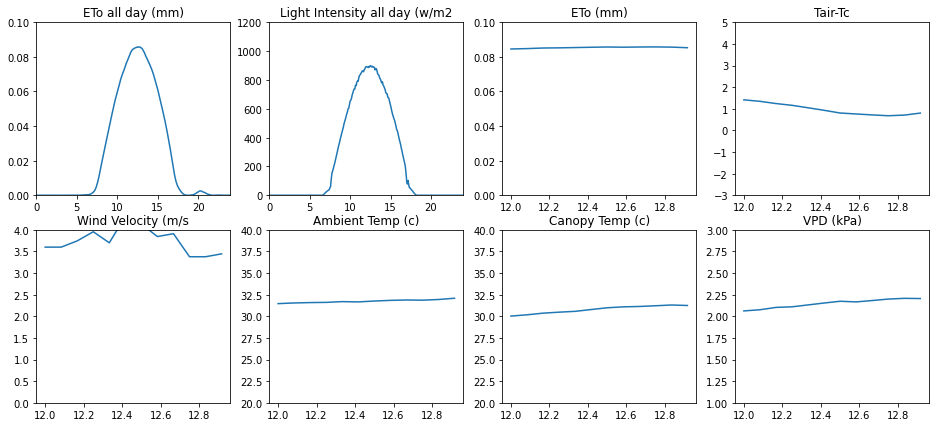

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-11
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-11
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-11
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-11
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-11
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-11
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-11
2021-01-11 00:00:00 ETo 6.0


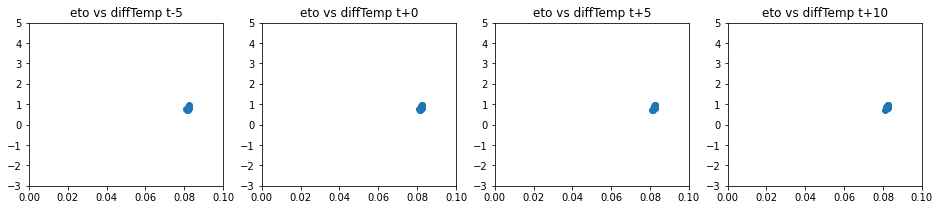

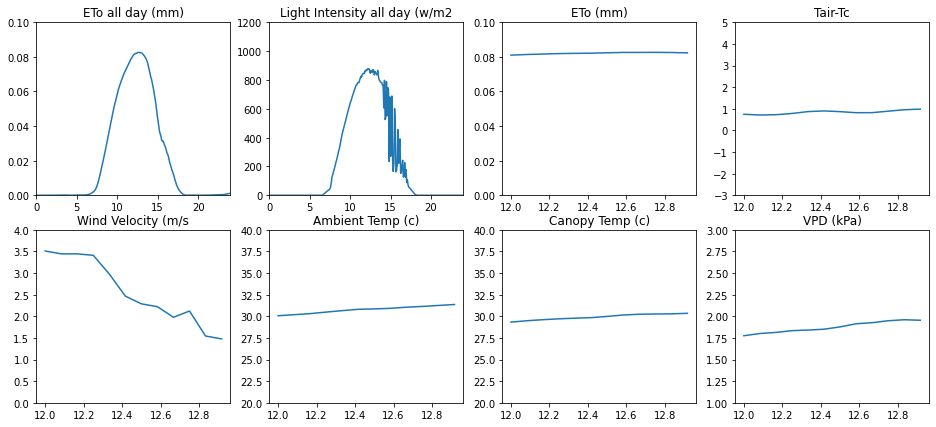

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-12
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-12
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-12
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-12
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-12
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-12
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-12
2021-01-12 00:00:00 ETo 6.2


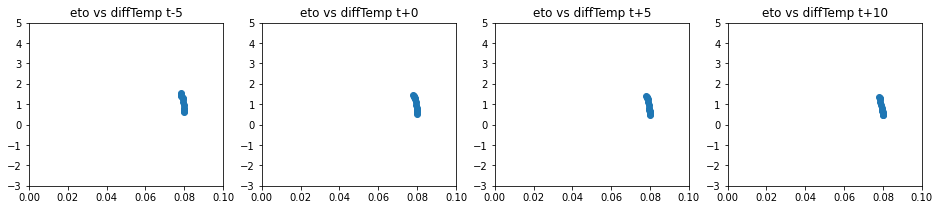

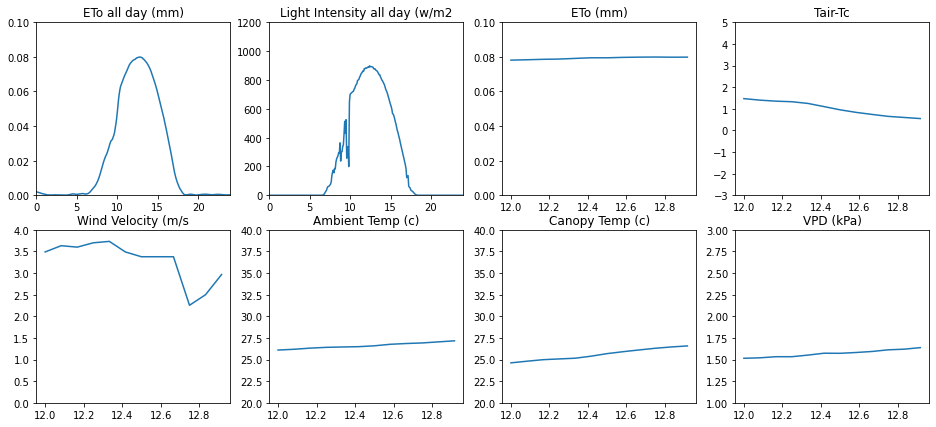

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-13
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-13
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-13
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-13
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-13
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-13
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-13
2021-01-13 00:00:00 ETo 6.1


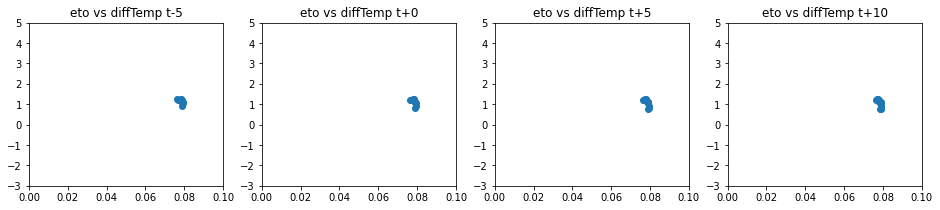

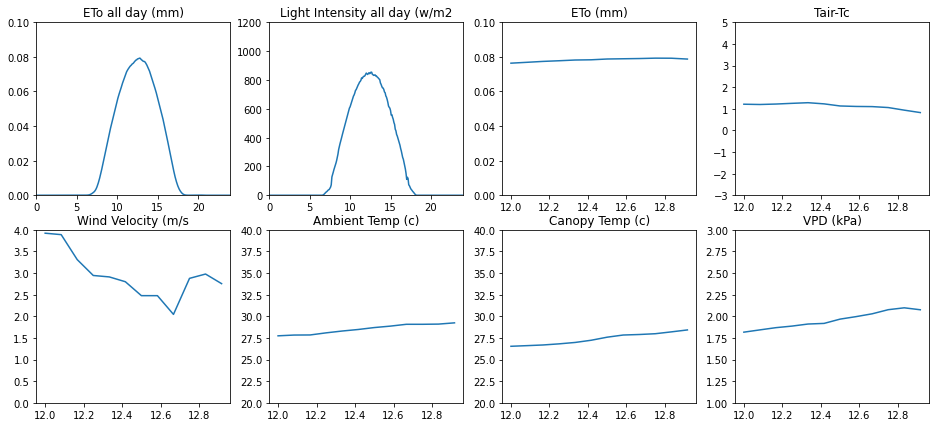

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-14
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-14
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-14
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-14
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-14
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-14
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-14
2021-01-14 00:00:00 ETo 6.2


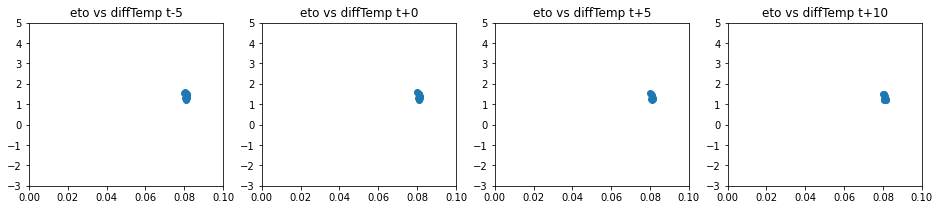

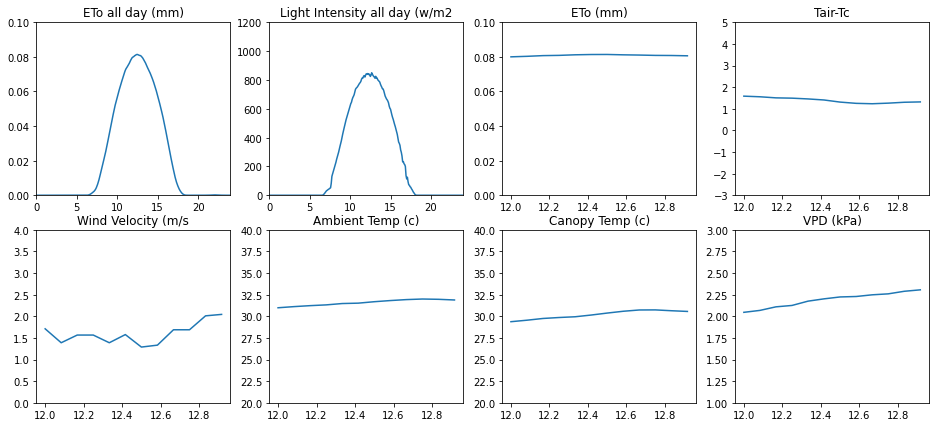

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-15
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-15
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-15
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-15
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-15
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-15
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-15
2021-01-15 00:00:00 ETo 4.6


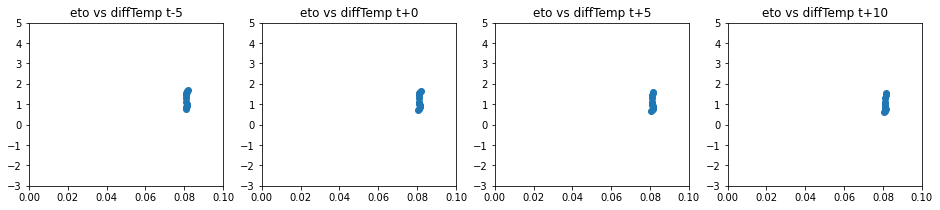

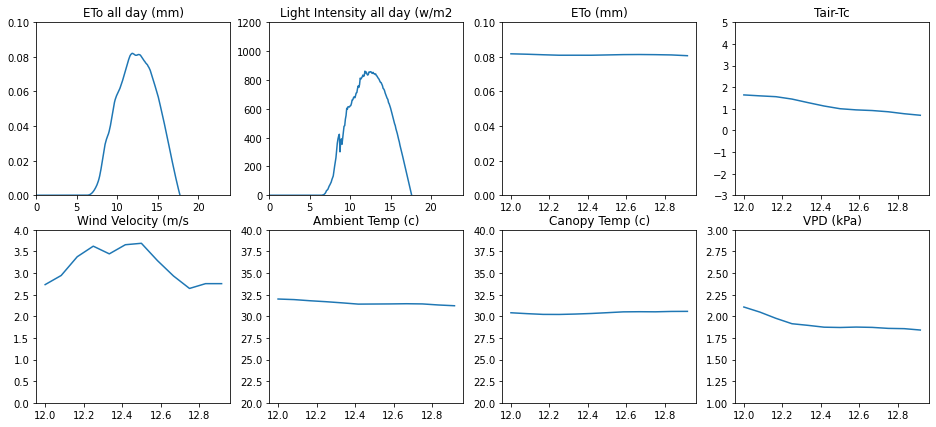

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-16
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-16
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-16
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-16
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-16
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-16
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-16
2021-01-16 00:00:00 ETo 5.1


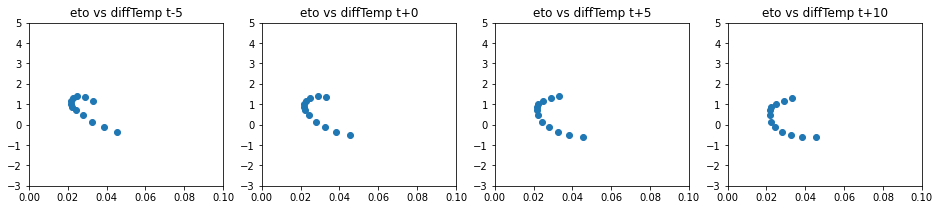

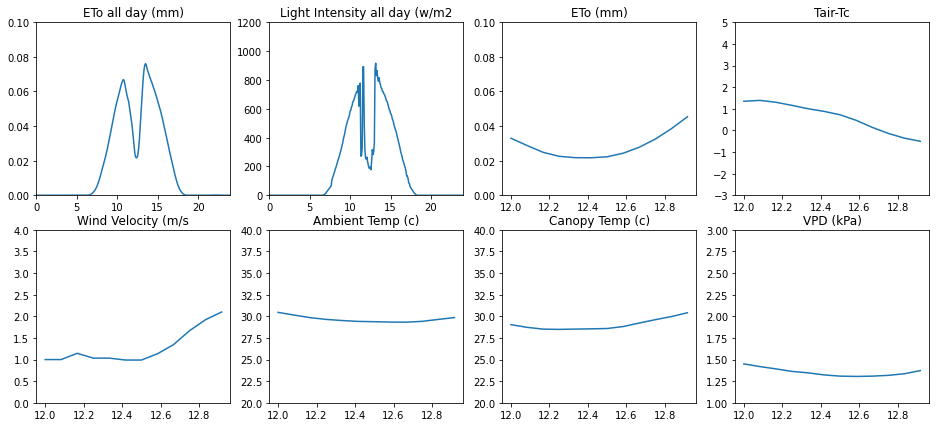

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-17
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-17
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-17
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-17
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-17
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-17
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-17
2021-01-17 00:00:00 ETo 6.1


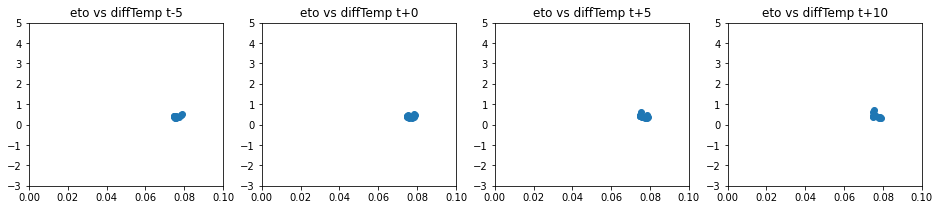

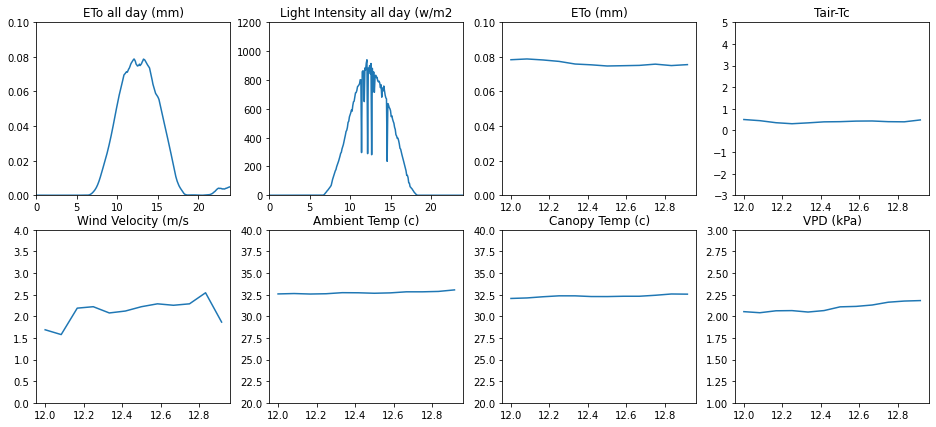

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-18
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-18
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-18
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-18
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-18
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-18
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-18
2021-01-18 00:00:00 ETo 6.4


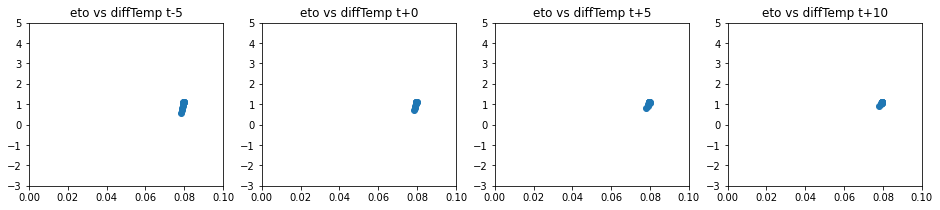

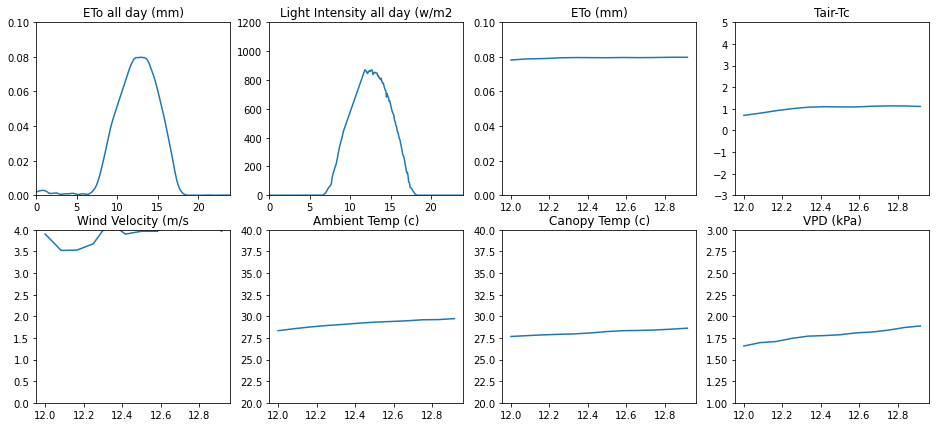

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-19
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-19
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-19
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-19
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-19
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-19
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-19
2021-01-19 00:00:00 ETo 4.8


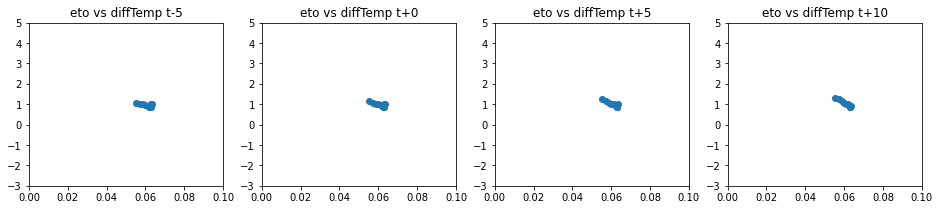

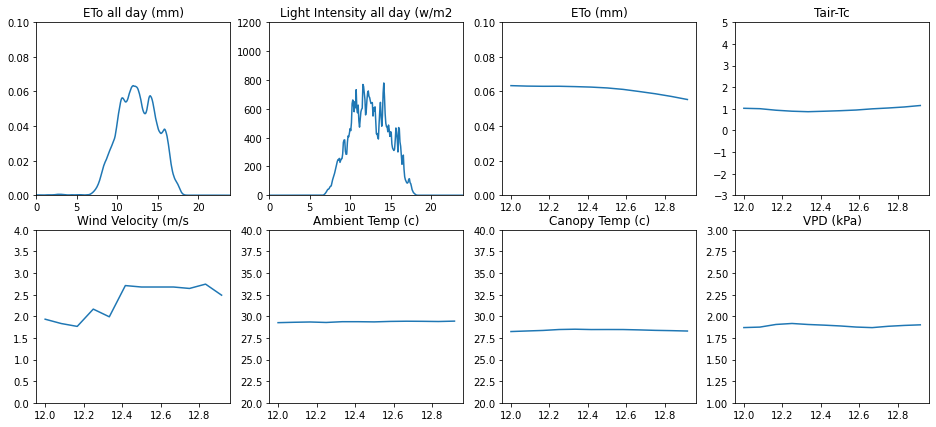

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-20
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-20
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-20
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-20
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-20
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-20
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-20
2021-01-20 00:00:00 ETo 5.5


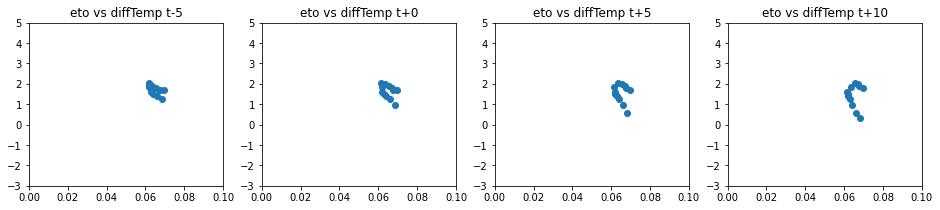

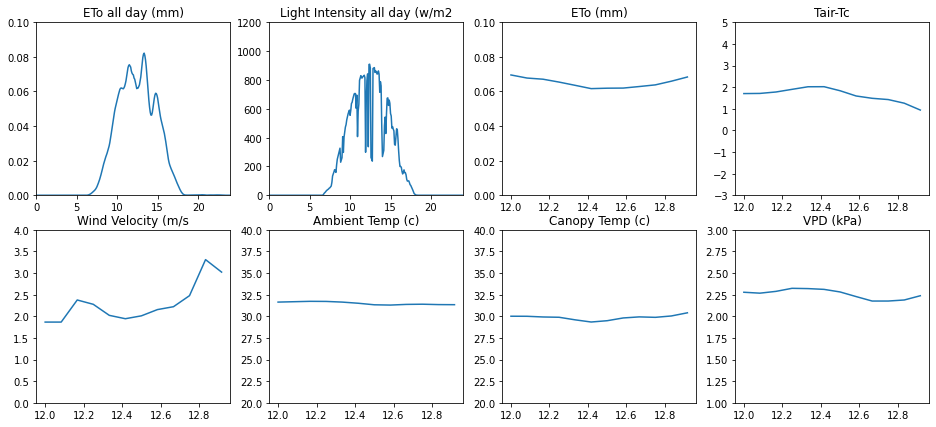

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-21
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-21
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-21
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-21
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-21
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-21
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-21
2021-01-21 00:00:00 ETo 6.2


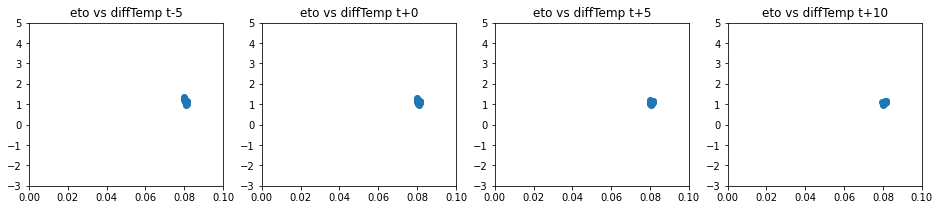

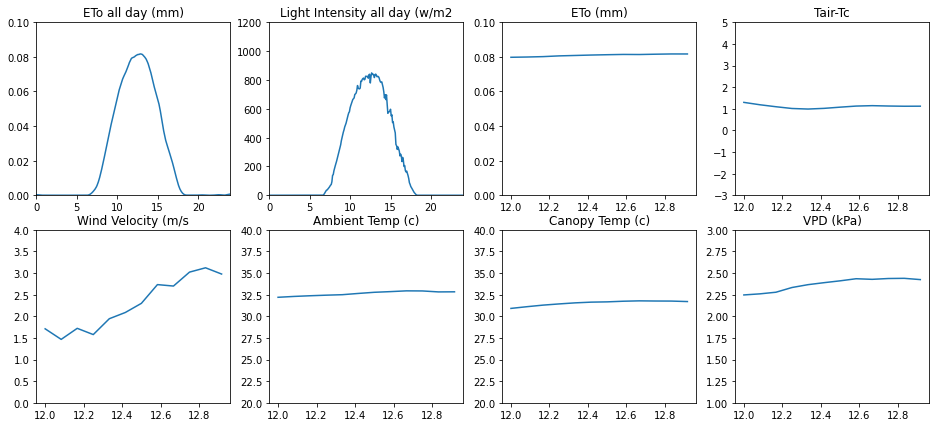

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-22
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-22
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-22
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-22
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-22
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-22
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-22
2021-01-22 00:00:00 ETo 6.3


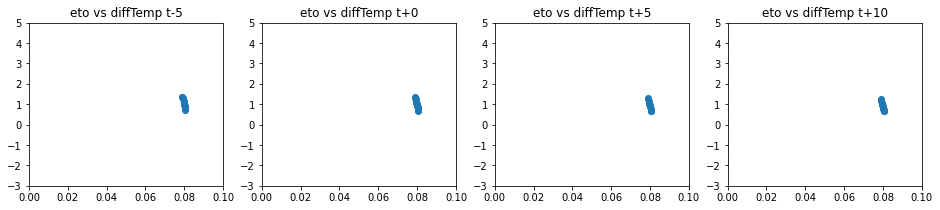

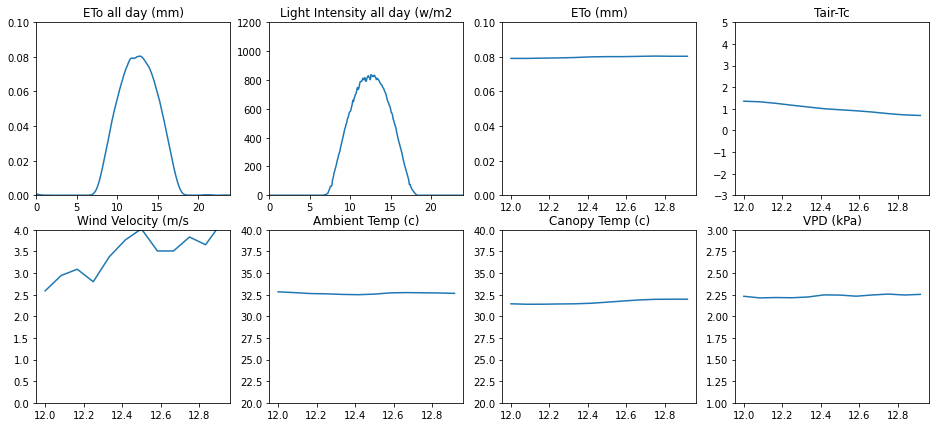

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-23
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-23
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-23
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-23
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-23
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-23
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-23
2021-01-23 00:00:00 ETo 6.2


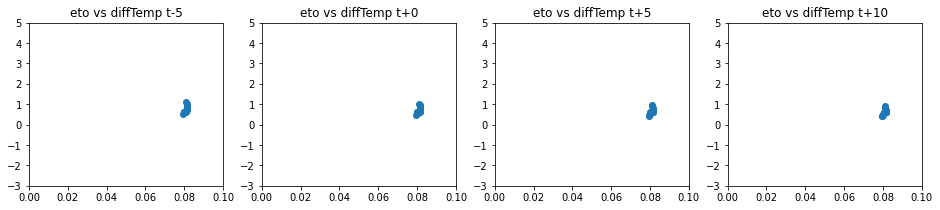

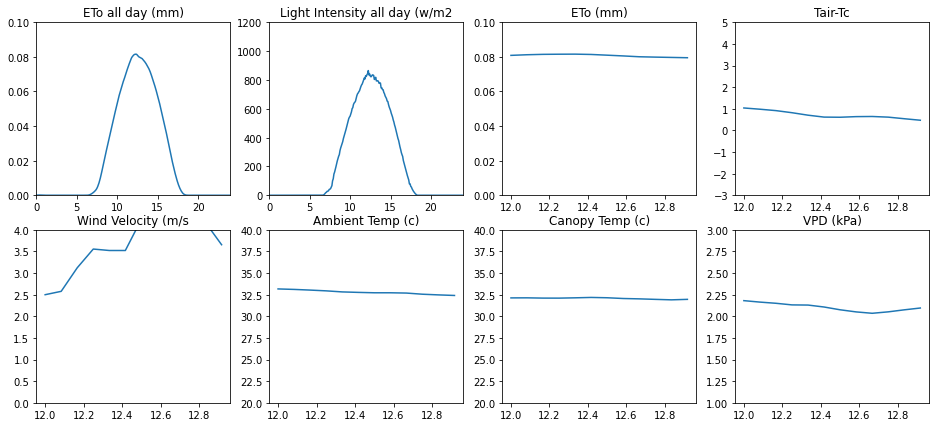

http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=DURIAN-01,16416,100,2021-01-24
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,1,2021-01-24
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,7,2021-01-24
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,2,2021-01-24
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,8,2021-01-24
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4096,5,2021-01-24
http://agritronics.nstda.or.th/ws/get.php?appkey=0c5a295bd8c07a080d5306&p=TEST-DURIAN-01-WT,4864,1100,2021-01-24
2021-01-24 00:00:00 ETo 5.6


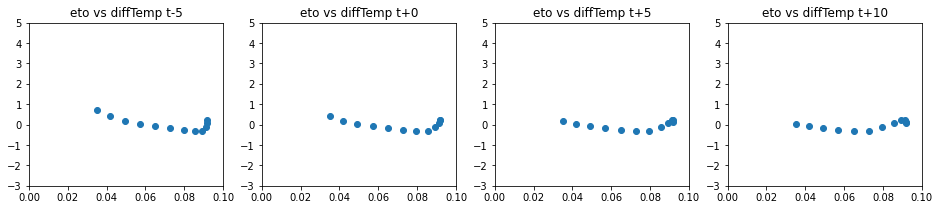

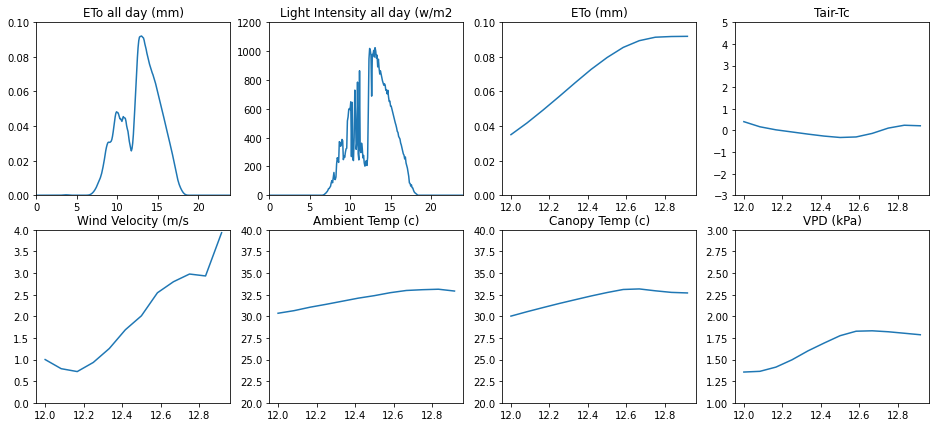

In [ ]:
all_dt_np = np.array([])
all_eto_np = np.array([])
all_ct_np = np.array([])
all_t_np = np.array([])
all_i_np = np.array([])
all_vpd_np = np.array([])
all_avg_dt_s = []
all_avg_eto_s = []
all_avg_ct_s = []
all_avg_t_s = []
all_avg_i_s = []
all_vpd_i_s = []

#start_date=datetime.now() + dt.timedelta(days=-1)        
start_date=datetime.strptime('2021/01/01','%Y/%m/%d')
#end_date=start_date
end_date=datetime.strptime('2021/01/24','%Y/%m/%d')

date = start_date
while date<=end_date:

  time_s,temp_canopy_s=GetDailyData('DURIAN-01','16416','100',date.strftime("%Y-%m-%d"))  
  temp_canopy_s=ReSamplingDailyData(time_s, temp_canopy_s,60*5)
  
  time_s,temp_ambient_s=GetDailyData('TEST-DURIAN-01-WT','4096','1',date.strftime("%Y-%m-%d"))
  time_s,light_intensity_s = GetDailyData('TEST-DURIAN-01-WT','4096','7',date.strftime("%Y-%m-%d"))
  time_s,rh_s = GetDailyData('TEST-DURIAN-01-WT','4096','2',date.strftime("%Y-%m-%d"))
  time_s,p_s = GetDailyData('TEST-DURIAN-01-WT','4096','8',date.strftime("%Y-%m-%d"))
  time_s,w_s = GetDailyData('TEST-DURIAN-01-WT','4096','5',date.strftime("%Y-%m-%d"))
  time2_s,sm_s = GetDailyData('TEST-DURIAN-01-WT',F'{0x1300}','1100',date.strftime("%Y-%m-%d"))

  light_intensity_s = ReSamplingDailyData(time_s, light_intensity_s,60*5)  
  temp_ambient_s=ReSamplingDailyData(time_s, temp_ambient_s,60*5)
  rh_s= ReSamplingDailyData(time_s, rh_s,60*5)
  p_s = ReSamplingDailyData(time_s, p_s,60*5)
  w_s = ReSamplingDailyData(time_s, w_s,60*5)
 

  temp_canopy_np = m_avg(np.array(temp_canopy_s),9)
  temp_ambient_np = m_avg(np.array(temp_ambient_s),9)
  light_intensity_np = np.array(light_intensity_s)
  if len(temp_ambient_np)!=len(temp_canopy_np) : 
    print(F"{len(temp_ambient_np)} {len(temp_canopy_np)}")
    date=date+dt.timedelta(days=1)
    continue
  temp_delta_np = m_avg(temp_ambient_np-temp_canopy_np,3)

  t_np = m_avg(np.array(temp_ambient_s),1)
  rh_np = m_avg(np.array(rh_s),9)
  p_np = m_avg(np.array(p_s),9)
  i_np = m_avg(np.array(light_intensity_s),9)
  w_np = m_avg(np.array(w_s),9)
  sm_np = np.array(sm_s)

  eto_np = m_avg(CalcETo(t_np,rh_np,p_np,i_np,w_np),5)
  vpd_np = m_avg(CalcVPD(t_np,rh_np),5)
  print(F'{date} ETo {np.sum(eto_np):.1f}')

  i_start=int(12.0*12)
  i_stop =int(13.0*12)

  all_eto_np = np.append(all_eto_np,eto_np[i_start:i_stop])
  all_avg_eto_s.append(np.average(eto_np[i_start:i_stop]))
  all_dt_np = np.append(all_dt_np,temp_delta_np[i_start:i_stop])
  all_avg_dt_s.append(np.average(temp_delta_np[i_start:i_stop]))

  time_np = np.arange(0,24,24/288)

  plt.rcParams['figure.figsize'] = [16, 3]
  #ax=plt.subplot()
  fig, axs = plt.subplots(1,4)
  t=-1
  for i in range(0,4) :
    axs[i].title.set_text(F"eto vs diffTemp t{t*5:+}")
    axs[i].set(xlim=(0,0.1),ylim=(-3,5))
    axs[i].scatter(eto_np[i_start:i_stop],temp_delta_np[i_start+t:i_stop+t])
    t=t+1
  #ax.scatter(eto_np[i_start:i_stop],temp_delta_np[i_start+t:i_stop+t])

  plt.rcParams['figure.figsize'] = [16, 7]
  fig, axs = plt.subplots(2,4)
  
  axs[0,0].title.set_text('ETo all day (mm)')
  axs[0,0].set(ylim=(0,0.1),xlim=(0,24))
  axs[0,0].plot(time_np,eto_np)

  axs[0,1].title.set_text('Light Intensity all day (w/m2')
  axs[0,1].set(ylim=(0,1200),xlim=(0,24))
  axs[0,1].plot(time_np,light_intensity_s)

  axs[0,2].title.set_text('ETo (mm)')
  axs[0,2].set(ylim=(0,0.1))
  axs[0,2].plot(time_np[i_start:i_stop],eto_np[i_start:i_stop])

  axs[0,3].title.set_text('Tair-Tc')
  axs[0,3].set(ylim=(-3,5))
  axs[0,3].plot(time_np[i_start:i_stop],temp_delta_np[i_start:i_stop])

  axs[1,0].title.set_text('Wind Velocity (m/s')
  axs[1,0].set(ylim=(0,4))
  axs[1,0].plot(time_np[i_start:i_stop],w_np[i_start:i_stop])
 
  axs[1,1].title.set_text('Ambient Temp (c)')
  axs[1,1].set(ylim=(20,40))
  axs[1,1].plot(time_np[i_start:i_stop],temp_ambient_np[i_start:i_stop])

  axs[1,2].title.set_text('Canopy Temp (c)')
  axs[1,2].set(ylim=(20,40))
  axs[1,2].plot(time_np[i_start:i_stop],temp_canopy_np[i_start:i_stop])

  axs[1,3].title.set_text('VPD (kPa)')
  axs[1,3].set(ylim=(1,3))
  axs[1,3].plot(time_np[i_start:i_stop],vpd_np[i_start:i_stop])

  plt.show()
  date=date+dt.timedelta(days=1)

plt.show()
 
#if __name__ == "__main__":
#  main()

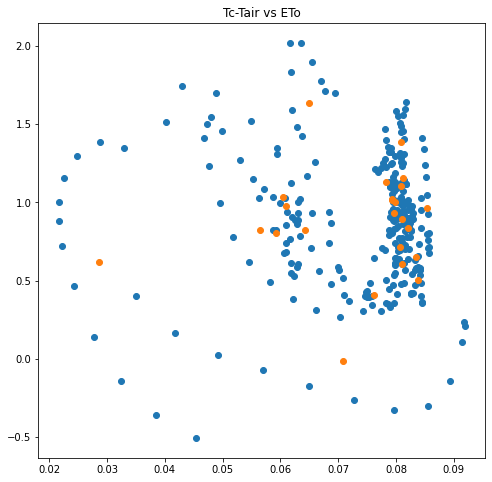

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.title("Tc-Tair vs ETo")
plt.scatter(all_eto_np,all_dt_np)
plt.scatter(all_avg_eto_s,all_avg_dt_s)
plt.show()